<a href="https://colab.research.google.com/github/UlaG0706/cwiczenie-wspolne-repo/blob/main/Time_to_Practice__Supervised_Learning_Regression_with_partial_solutions_praktyka_regresja_live_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img height="180px" src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" align="left" hspace="30px" vspace="50px"/>

# Welcome to your next notebook with SDA!

During the classes we will mostly use [Google Colaboratory](https://colab.research.google.com/?hl=en) which is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud.

However, for bigger projects, especially involving Deep Learning and/or big data reading, it might be a better choice to setup Jupyter Notebook or Jupyter Lab on your computer. Also, it is worth noticing that there is a great number of useful extensions (see [nbextensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/index.html) and [jupyter-labextension](https://jupyterlab.readthedocs.io/en/stable/user/extensions.html)) not available for Colab users.

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# Supervised Learning: Regression
Start by reading through the presentation slides.

<br>

After the bckground materials on the **<font color='#ed7d31'>SUPERVISED LEARNING: REGRESSION</font>** you will be familiar with **scikit learn**, the most common library used by Data Scientists and AI Engineers for classical Machine Learning algorithms, incl. tackling regression problems.

<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>

# 1. Introduction to regression problems
## Based on Housing Prices

<img src="https://drive.google.com/uc?export=view&id=1HvzhT0v9GNDzvFrQf06MoxBK9jHRRRQd" alt="Regression problems: introduction" title="Regression problems: introduction" align="center" width="600px" hspace="30px" vspace="10px"/>


Download the [Housing Prices Dataset](https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?resource=download).

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#path='/content/drive/MyDrive/SDA Data Science/files/Housing.csv'
path='/content/Housing.csv'
house_prices=pd.read_csv(path, usecols=['price', 'area', 'airconditioning']) #interesuja nas tylko te 3 kolumny w '' poki co czyli cene, powierzchnie i czy jest klima na wyposazeniu domu
house_prices.head()
#cena w dolarach, powierzchnia w stopach 2 to ok 1/4metra czyli podzielic area na 16 zeby mniej wiecej przejsc na metry kwadratowe

,price,area,airconditioning
0,13300000,7420,yes
1,12250000,8960,yes
2,12250000,9960,no
3,12215000,7500,yes
4,11410000,7420,yes


In [7]:
#house_prices['area']*0.3048**2 #zamienienie na metry 2

0      689.340557
1      832.411238
2      925.314278
3      696.772800
4      689.340557
          ...    
540    278.709120
541    222.967296
542    336.309005
543    270.347846
544    357.676704
Name: area, Length: 545, dtype: float64

In [6]:
house_prices.describe()

,price,area
count,5.450000e+02,545.000000
mean,4.766729e+06,5150.541284
std,1.870440e+06,2170.141023
min,1.750000e+06,1650.000000
25%,3.430000e+06,3600.000000
50%,4.340000e+06,4600.000000
75%,5.740000e+06,6360.000000
max,1.330000e+07,16200.000000


In [ ]:
#mean to srednia

Remembering `scatteplot()` syntax and list of arguments:
```python
seaborn.scatterplot(
    data=None, *, x=None, y=None, hue=None, size=None, style=None,
    palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None,
    size_norm=None, markers=True, style_order=None, legend='auto', ax=None,
    **kwargs
)
```

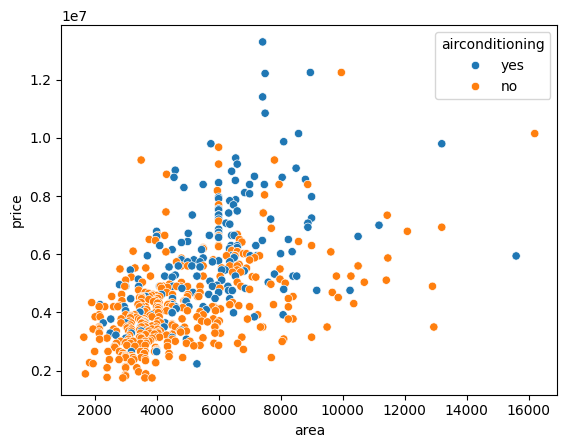

In [8]:
sns.scatterplot(
    data=house_prices,
    x='area',
    y='price',
    hue='airconditioning'
)

plt.show()
#rysujemy wykres punktowy i kolorujemy za pomoca airconditioning info mieszkania gdzie jest klima i gdzie nie ma - niebieskie, na osi x mamy powierzchnie, na y mamy cene
#do pewnego momentu metrazy jest im wieksza powierzchnia mieszkania tym cena rosnie, ale jak juz wchodzimy na pulap metrazu to juz nie ma takiego znaczenia tak jak w PL roznica miedzy 60 a 80m roznica bedzie ogromna, ale juz pom 150 a 180m2 to juz roznica bedzie marginalna bo mniej chetnych na duze mieszkania

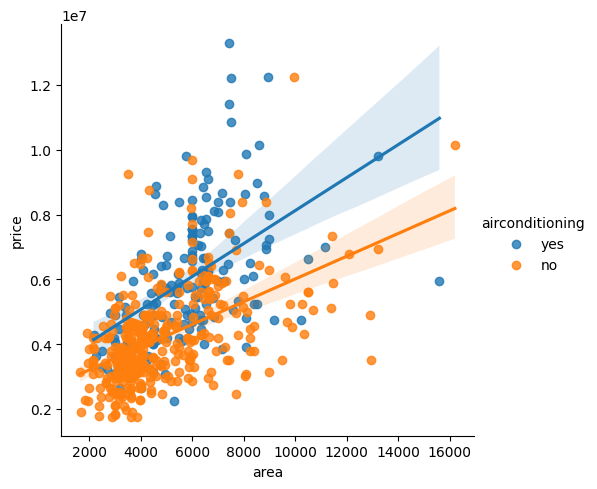

In [12]:
sns.lmplot(
    data=house_prices,
    x='area',
    y='price',
    hue='airconditioning'
)

plt.show()

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Linear regression in scikit-learn

In scikit-learn (sklearn), the **<font color='#ed7d31'>LinearRegression class</font>** is used to perform linear regression, which is a common supervised learning algorithm for predicting a continuous target variable based on one or more input features. Linear regression assumes a linear relationship between the features and the target variable.

See the official [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [13]:
#definiujemy sobie co jest naszym x, y.
X = house_prices[['area']] # x to zmienna objasniająca / niezależna bo ona w tym rownaniu nie zalezy od niczego . za pomoca x chcemy wyjasnic y. tych zmiennych moze byc wiecej dlatego mozna dodatkowy nawias
y = house_prices['price'] # y to zmienna objasniana / zmianna zależna, bo zalezy od pozostałych zmiannych

In [15]:
# import LinearRegression class from linear_model module - import fukcji regresi liniowej z biblioteki
from sklearn.linear_model import LinearRegression

In [11]:
# create an instance of LinearRegression class, ie. instantiate object - tworze pusta instancje regresji
#putsa instancja za pom ktora trenuje model za pomoca moich danych . trenuje czyli mowie znajdz zaleznosci miedzy x a y i stwor linie regresji ktora te zaleznosci bedzie objasniac
model = LinearRegression()
#i dopiero w drugim kroku trenuje model
model.fit(X, y)

LinearRegression()

Once you have created the **<font color='#ed7d31'>LinearRegression object</font>** and trained the model using your training data you can:
*   make predictions (on the same or entirely new data samples)
*   access model parameters using object `Attributes`
    * `.coef_` - the coefficients (weights) for each input feature
    * `.intercept_` - the intercept



In [16]:
model.intercept_ #tzw wyraz wolny i w naszym wypadku to wartos ponizej

2387308.48239643

In [17]:
#wspolczynnik/i modelu
model.coef_

array([461.97489427])

In [25]:
from IPython.display import display, Latex

beta0 = round(model.intercept_, 2)
beta1 = round(model.coef_[0], 2)

display(Latex(f'$y_i = \\beta_0 + \\beta_1 \cdot x_1 = {beta0} + {beta1} \cdot x_1 $'))


<IPython.core.display.Latex object>

In [ ]:
#duzym plusem regresji liniowej jest to ze da sie ja interpretowac. tzn ze sporo algorytmow maszyn learningowac to skrzynki czarne. on jest b skutecznie w stanie przewidziec cene mieszkania ale nie wiemy do konca w tych algorytmach deeplearningowych odtworzyc co tam sie w srodkiu dzieje (da sie krok po kroku w iteracyjny sposob, ale i tak bedzie ciezko wyjasnic os nie technicznej.

In [ ]:
#461.97 * area co to oznacza ? - nachylenie krzywej i w tym przypadku konkretnym to oznacza, że wraz ze wzrostem powierzchni mieskzania o jednostke(stpe kwadratowa), cena mieszkania rosnie o 461.97 jednostek(dolarow)
# co sie dzieje z naszym y kiedy x rosnie o jednostke. cena wzrosnie o prawie 462 $

In [ ]:
# wyraz wolny 2387308 - co oznacza? że o tyle musimy przesunac nasza krzywa zeby byla bardziej dopasowana do naszych punktow.
#bardzo czesto wyraz wolny jest bezsensu do interpretowania. bo co oznacza? ze w momencie gdy powierzchnia mieszkania = 0st.kwadratowych czyli nie ma powierzchni to cena wynosi 2,38mln $. bez sensu


In [24]:
#przykładowy model gdybysmy chcieli wyjasnic temperature w zal od opadow.
#wyraz wolny 5(stopni) - taka bedzie temperatura gdy nie wieje i nie pada, to predzej ma sens interpretowania wyrazu wolnego, ale w przypadku cen mieszkan interpretacja cnie ma sensu

In [26]:

model.predict([[2500]])  # one observation. teraz mozemy dokonywać prognoz. jaka powinna byc cena mieszkania dla danej powierzchni mieszkania. tu mamy tylko area czyli powierzchnie

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3542245.71807839])

In [27]:
model.predict([[2500], [7240]])  # two observations - mozemy przewidywac wiecej niz 1 obserwacje

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3542245.71807839, 5732006.71693138])

In [29]:
#robimy sobie obiekt d 1800 do 16000stop kwadrat
X_test = np.linspace(start=1800, stop=16000).reshape(-1, 1)

#i dla tego x testa robimy predykcje ceny mieszkania na podst naszego modelu
y_test = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


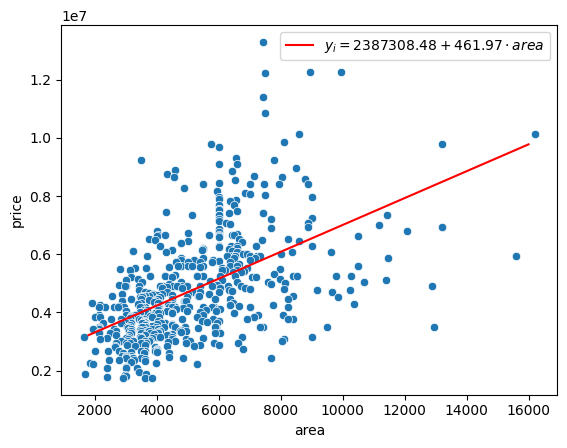

In [30]:
#wizualizacja modelu jak sie zachwouje na podst naszych punktow
sns.scatterplot(
    data=house_prices,
    x='area',
    y='price'
)
plt.plot(
    X_test,
    y_test,
    c='red',
    label=f'$y_i = {beta0} + {beta1} \cdot area $'
)

plt.legend()
plt.show()

In [31]:
y_train_pred = model.predict(X)

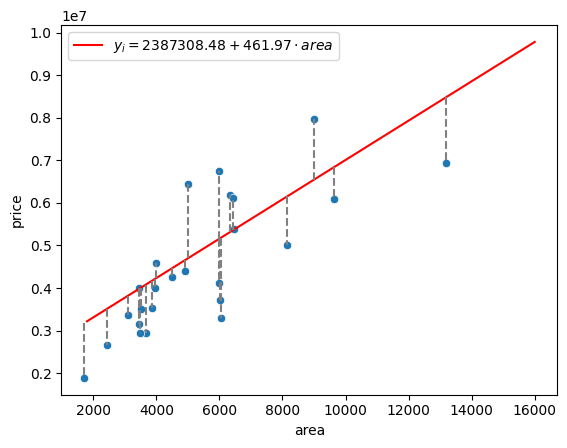

In [33]:
#losuje 25 punktow i dal nich robie wizualizacje i dodatkowo pokazuje na czym polega regresja.
#regresja polega na tym zeby znalezc taka czerwona linie, ktora bedzie mozliwie jak najblizej tych punktow niebieskich - te przerywane linie oznaczaja odleglosc od lini regresji
#widzimy ze niektore punkty sa powyzej lini czyli na plusie to co onizej to na minusie. wiec gdybysmy brali zwykle odleglosci to obraz moglby nam sie zaklamac bo by sie zerowaly. wiec jest myk mnk
#MNK - optymalizacja regresji - metoda najmniejszych kwadratow lub
#OLS - ordinary list squares - Sum of squared residuals

house_prices_sample = house_prices.sample(25, random_state=0)

sns.scatterplot(
    data=house_prices_sample,
    x='area',
    y='price'
)
plt.plot(
    X_test,
    y_test,
    c='red',
    label=f'$y_i = {beta0} + {beta1} \cdot area $'
)

for i, obs in house_prices_sample.iterrows():
    plt.vlines(
        x=obs['area'],
        ymin=y_train_pred[i],
        ymax=obs['price'],
        color='grey',
        linestyles='dashed'
    )

plt.legend()
plt.show()

In [ ]:
#tutaj zaczynamy za tydzien

### Remainders/residues distribution

In [ ]:
remainders = y_train_pred - y
remainders

0     -7.484838e+06
1     -5.723396e+06
2     -5.261422e+06
3     -6.362880e+06
4     -5.594838e+06
           ...     
540    1.953233e+06
541    1.728898e+06
542    2.309658e+06
543    1.981655e+06
544    2.415912e+06
Name: price, Length: 545, dtype: float64

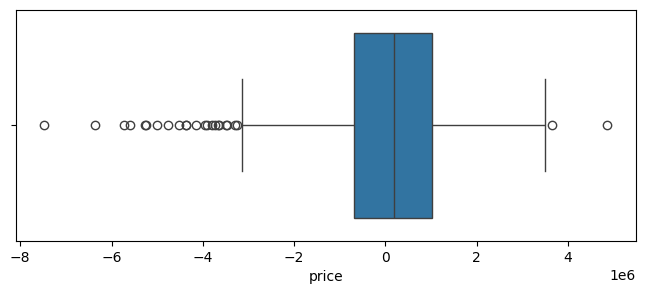

In [ ]:
plt.figure(figsize=(8, 3))

sns.boxplot(x=remainders)
plt.show()

In [ ]:
remainders.abs()

0      7.484838e+06
1      5.723396e+06
2      5.261422e+06
3      6.362880e+06
4      5.594838e+06
           ...     
540    1.953233e+06
541    1.728898e+06
542    2.309658e+06
543    1.981655e+06
544    2.415912e+06
Name: price, Length: 545, dtype: float64

In [ ]:
remainders ** 2

0      5.602280e+13
1      3.275727e+13
2      2.768256e+13
3      4.048624e+13
4      3.130221e+13
           ...     
540    3.815120e+12
541    2.989089e+12
542    5.334518e+12
543    3.926958e+12
544    5.836630e+12
Name: price, Length: 545, dtype: float64

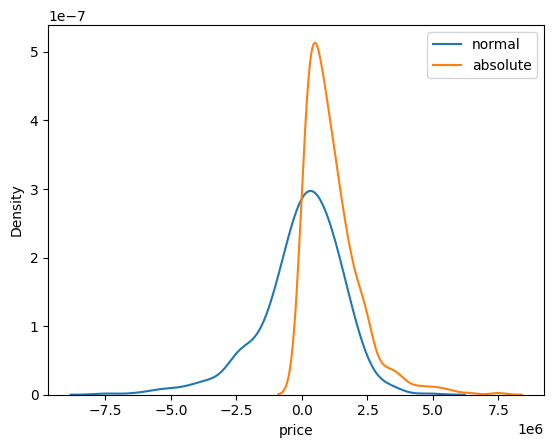

In [ ]:
sns.kdeplot(remainders, label='normal')
sns.kdeplot(remainders.abs(), label='absolute')
# sns.kdeplot(remainders ** 2, label='squared')

plt.legend()
plt.show()

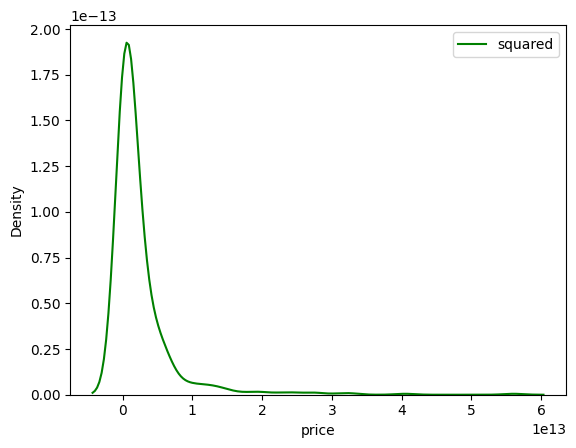

In [ ]:
# sns.kdeplot(remainders, label='normal')
# sns.kdeplot(remainders.abs(), label='absolute')
sns.kdeplot(remainders ** 2, label='squared', c='green')

plt.legend()
plt.show()

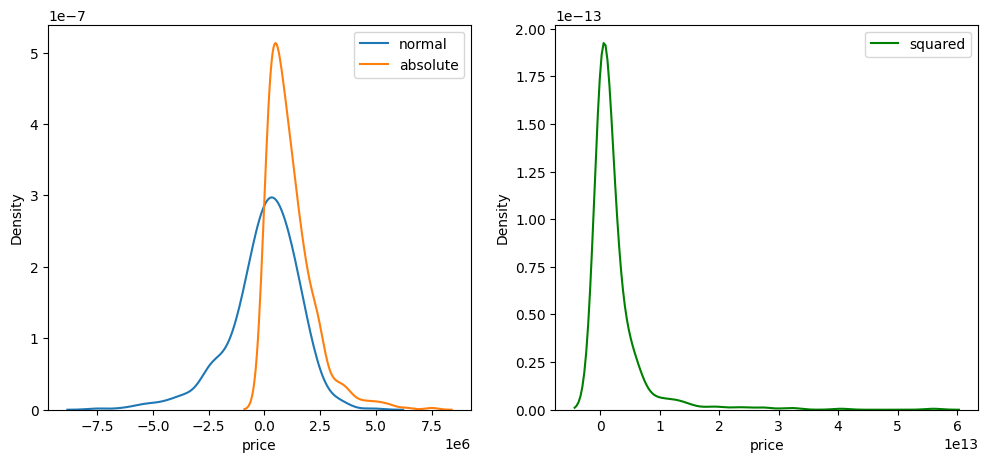

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.kdeplot(remainders, label='normal', ax=ax1)
sns.kdeplot(remainders.abs(), label='absolute', ax=ax1)
ax1.legend()

sns.kdeplot(remainders ** 2, label='squared', c='green', ax=ax2)
ax2.legend()

plt.show()

### Cost function(s)

In machine learning, a **<font color='#ed7d31'>cost function</font>**, also known as an **<font color='#ed7d31'>objective function</font>** or **<font color='#ed7d31'>loss function</font>**, is a mathematical function that quantifies the overall error between the predicted output of a machine learning model and the actual target output. It allows to aggregate the errors together and is an essential component in model training as it helps measure how well the model is performing.

 It also provides a basis for  to minimize the error.

The goal of machine learning is typically to **<font color='green'>minimize the cost function</font>** by adjusting the model's parameters. We aim to make the model's predictions as close as possible to the actual target values. The choice of cost function depends on the specific problem being addressed and the nature of the data. The most common cost function used in regression problems are:
* mean squared error (MSE),
* mean absolute error (MAE),
* coefficient of determination (R2-score).

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
remainders.sum(), remainders.abs().sum(), np.sum(remainders ** 2)

(-2.980232238769531e-07, 638906503.6666155, 1356429462008458.0)

In [ ]:
# mean absolute error
mae = remainders.abs().sum() / len(remainders)
mae

1172305.5113148908

In [ ]:
assert mae == mean_absolute_error(y, y_train_pred)

In [ ]:
# mean squared error
mse = np.sum(remainders ** 2) / len(remainders)
mse

2488861398180.6567

In [ ]:
assert mse == mean_squared_error(y, y_train_pred)

In [ ]:
# root mean squared error
rmse = np.sqrt(mse)
rmse

1577612.5627607866

In [ ]:
assert rmse == mean_squared_error(y, y_train_pred, squared=False)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(y, y_train_pred)

0.26634585269407557

In [ ]:
# policz sam i porównaj wyniki
# mape
np.sum(np.abs(remainders / y)) / len(y)

0.26634585269407557

In [ ]:
# policz również WMAPE with sklearn and from the formula
mean_absolute_percentage_error(y, y_train_pred, sample_weight=y)

0.24593499030366825

In [ ]:
remainders.abs().sum() / np.sum(y)

0.24593499030366825

### The least squares method

During the training process, **<font color='green'>the model's parameters are adjusted iteratively using optimization algorithms</font>**, such as the least squares method based on gradient descent. The gradient of the cost function with respect to the model's parameters provides the direction of steepest descent, guiding the optimization algorithm towards the minimum.

Let's follow this process step by step to better understand what happens underneath when we sit comfortably in front of the computer and train the model through `.fit()` method implemented in LinearRegression class by provided by sklearn.

1. Let's define a function that for predetermined set of observations (both X and y) will return **<font color='darkblue'>the value of the cost function</font>** depending on the parameter $\theta_1$ where $y=\theta_1\cdot X$ (here X is contains a single feature). Check this value for several $\theta_0$ parameters and see if you can find the best (i.e. optimal) parameter.

In [ ]:
# def cost_function(X, y, theta_1):
#     y_pred = (X.values * theta_1).reshape(1, -1)
#     return np.sum((y.values - y_pred) ** 2) / len(X)

# cost_function(X, y, theta_1=250)
# cost_function(X, y, theta_1=2000)

In [ ]:
def cost_function(theta_1):
    return mean_squared_error(y, X.values * theta_1)

In [ ]:
cost_function(250)

14804181846359.816

In [ ]:
cost_function(500)

7298149247575.413

In [ ]:
THETAS = np.linspace(start=0, stop=2500).reshape(-1, 1)
COSTS = [cost_function(theta) for theta in THETAS]

In [ ]:
np.random.seed(6)

theta_1_initial = np.random.random() * 2000
theta_1_initial

1785.7203028720032

2. Taking into account **<font color='darkblue'>the formula of the cost function</font>**, $$J(\theta_1) = \frac{\sum_{i=1}^n (y_i - \theta_1\cdot X_i)^2}{n}$$ implement a new function that returns the value of the derivative at a given point, ie. $$J'(\theta_1) = \frac{2\cdot \sum_{i=1}^n [(y_i - \theta_1\cdot X_i)\cdot (-X_i)]}{n} = \frac{2\cdot \sum_{i=1}^n (\theta_1\cdot X_i^2 - y_i\cdot X_i)}{n}$$

In [ ]:
def cost_function_theta_1_derivative(X, y, theta_1):
    val1 = theta_1 * (X.values ** 2)
    val2 = np.multiply(y.values.reshape(-1, 1), X.values.reshape(-1, 1))

    numerator = 2 * np.sum(val1 - val2)
    return numerator / len(X)

In [ ]:
cost_function_theta_1_derivative(X, y, theta_1_initial)

58086486695.21558

3. The goal of **<font color='darkblue'>cost function optimization</font>** is to find the set of model parameters (coefficients, here $\theta_1$) that minimize the cost function, thereby achieving the best possible fit to the data. The optimization process involves adjusting the coefficients iteratively to minimize the cost function.

In [ ]:
def get_next_optimization_step(theta_1_initial):
    # cost function values
    plt.plot(
        THETAS,
        COSTS,
        label='$y = J(\\theta_1) $'
    )

    # cost function value for the current step (ie. theta parameter)
    plt.plot(
        theta_1_initial,
        cost_function(theta_1_initial),
        c='darkorange',
        marker='o',
        label='initial point'
    )

    # tangent line parameters & plot
    slope = cost_function_theta_1_derivative(X, y, theta_1_initial)
    beta = cost_function(theta_1_initial) - slope * theta_1_initial

    tangent_line_range = np.linspace(
        start=max(0, theta_1_initial-500),
        stop=min(theta_1_initial+500, 2500),
    ).reshape(-1, 1)

    plt.plot(
        tangent_line_range,
        slope * tangent_line_range + beta,
        c='red',
        label='tangent line'
    )

    plt.title(f'Current value of $\\theta _1 = {round(theta_1_initial)}$')
    plt.legend()
    plt.show()

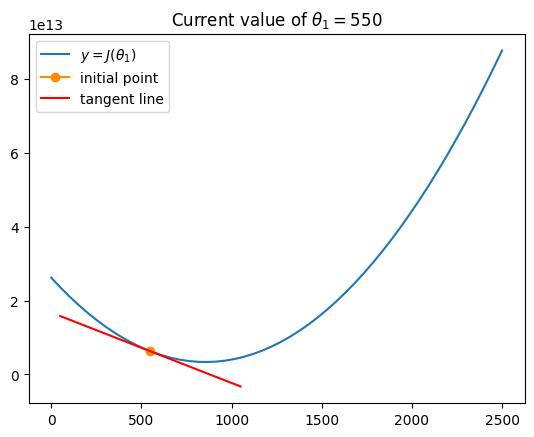

In [ ]:
get_next_optimization_step(550)

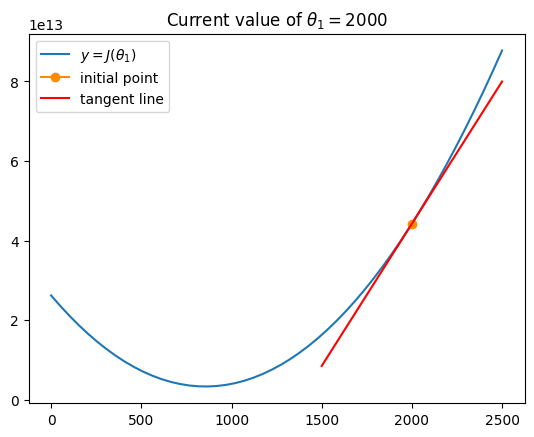

In [ ]:
get_next_optimization_step(2000)

4. **<font color='darkblue'>Gradient descent</font>** is an iterative optimization algorithm that starts with an initial set of coefficients and updates them in the opposite direction of the gradient of the cost function. It continues this process until it reaches a minimum point where the gradient is close to zero. The learning rate determines the step size taken in each iteration.

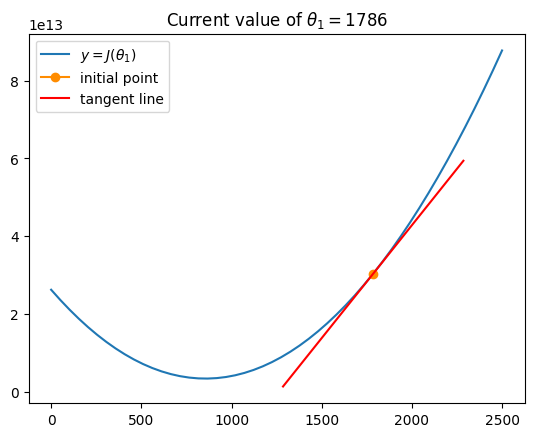

In [ ]:
np.random.seed(6)

theta_1_initial = np.random.random() * 2000
theta_1_initial

get_next_optimization_step(theta_1_initial)

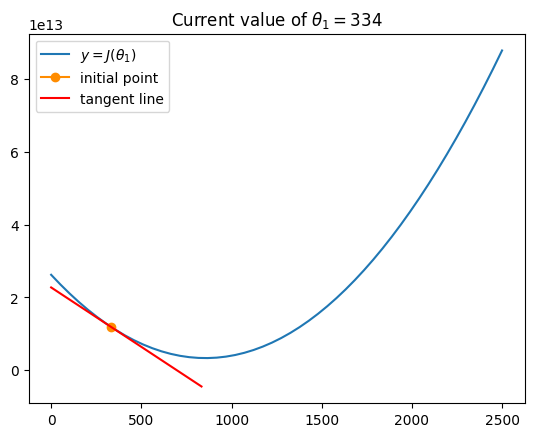

In [ ]:
alpha = 0.000000025
theta_1_initial = theta_1_initial - alpha * cost_function_theta_1_derivative(X, y, theta_1_initial)

get_next_optimization_step(theta_1_initial)

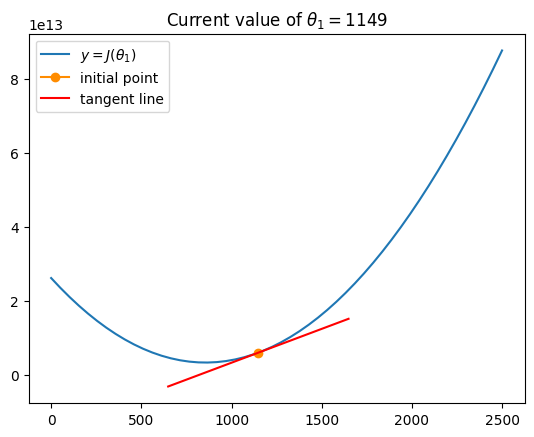

In [ ]:
theta_1_initial = theta_1_initial - alpha * cost_function_theta_1_derivative(X, y, theta_1_initial)

get_next_optimization_step(theta_1_initial)

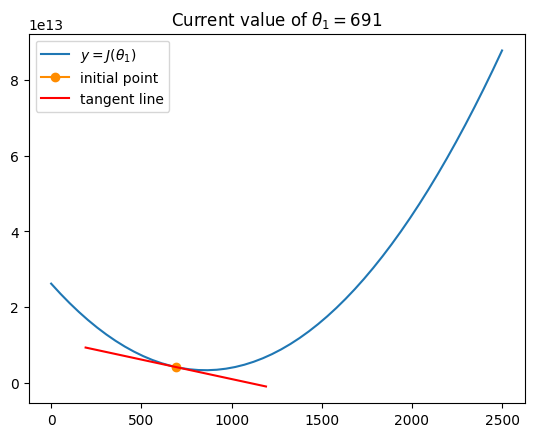

In [ ]:
theta_1_initial = theta_1_initial - alpha * cost_function_theta_1_derivative(X, y, theta_1_initial)

get_next_optimization_step(theta_1_initial)

In [ ]:
theta_1_initial = np.random.random() * 2000

theta_1_initial_list = []
cost_function_values = []

for i in range(100):
    theta_1_initial_list.append(theta_1_initial)
    cost_function_values.append(cost_function(theta_1_initial))

    theta_1_initial = theta_1_initial - alpha * cost_function_theta_1_derivative(X, y, theta_1_initial)

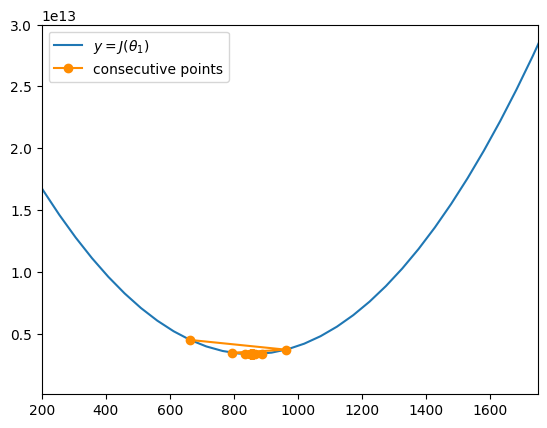

In [ ]:
# plt.figure(figsize=())

plt.plot(
    THETAS,
    COSTS,
    label='$y = J(\\theta_1) $'
)

plt.plot(
    theta_1_initial_list,
    cost_function_values,
    c='darkorange',
    marker='o',
    label='consecutive points'
)

plt.xlim([200, 1750])
plt.ylim([1e11, 3e13])

plt.legend()
plt.show()

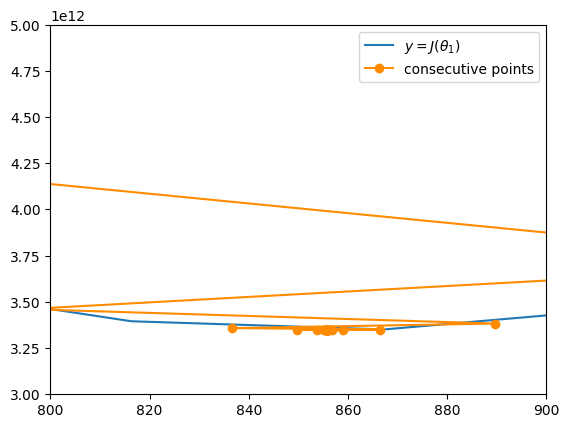

In [ ]:
# plt.figure(figsize=())

plt.plot(
    THETAS,
    COSTS,
    label='$y = J(\\theta_1) $'
)

plt.plot(
    theta_1_initial_list,
    cost_function_values,
    c='darkorange',
    marker='o',
    label='consecutive points'
)

plt.xlim([800, 900])
plt.ylim([3e12, 5e12])

plt.legend()
plt.show()

In [ ]:
# best parameter (here line slope)
theta_1_initial_list[-1]

855.7099498697572

In [ ]:
# best score
cost_function_values[-1]

3346764152880.9985

5. Check the results obtained by our algorithm.

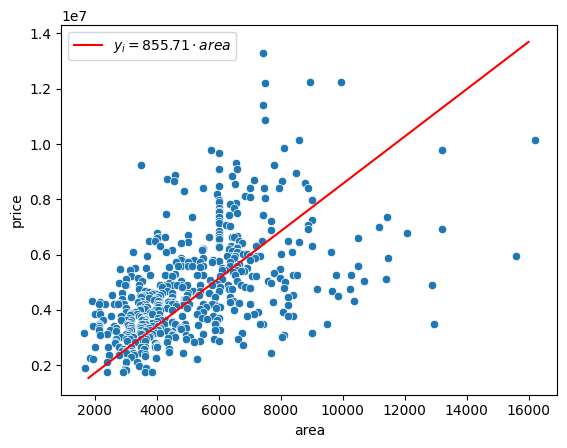

In [ ]:
chosen_theta = theta_1_initial_list[-1]

sns.scatterplot(
    data=house_prices,
    x='area',
    y='price'
)

plt.plot(
    X_test,
    X_test * chosen_theta,
    c='red',
    label=f'$y_i = {round(chosen_theta, 2)} \cdot area $'
)

plt.legend()
plt.show()

### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Using the implementation in scikit-learn, create a simple linear regression model in which the bias is zero (i.e., do not include Y-intercept as an additional model parameter to be learned).

Compare the result with the one obtained above.

### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Create two graphs on which you can trace:
* the change in the value of the loss function
* how the theta parameter changes.

Then consider whether the proposed number of iterations, ie. 100, was sufficient. If so, perhaps our manual training could have been completed earlier? How to know when to stop and how to implement this?

### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Experiment with different values of the learning rate so that in successive iterations you get:
* slightly worse results ($\alpha$ too high),
* very close results for the loss value ($\theta_1$ should change significantly),
* or stay on one side from the extreme all the time while correcting loss value (optimal/small $\alpha$).

<img src="https://drive.google.com/uc?export=view&id=1VZGk9YwTTxSG6-Zj-Qrf2fzlnMiZS-Ug" alt="Learning rate: experiments" title="Learning rate: experiments" align="center" width="1000px" hspace="30px" vspace="10px"/>

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2, include_bias=False)
X_poly = poly.fit_transform(X)

In [ ]:
poly.get_feature_names_out()

array(['area', 'area^2'], dtype=object)

In [ ]:
pd.DataFrame(X_poly, columns=poly.get_feature_names_out())

,area,area^2
0,7420.0,55056400.0
1,8960.0,80281600.0
2,9960.0,99201600.0
3,7500.0,56250000.0
4,7420.0,55056400.0
...,...,...
540,3000.0,9000000.0
541,2400.0,5760000.0
542,3620.0,13104400.0
543,2910.0,8468100.0


Alternatively, in scikit-learn's `PolynomialFeatures` class, the `set_output` parameter is used to control the formatting of the output array when generating polynomial features from input data. PolynomialFeatures is a preprocessing class that allows you to generate polynomial and interaction features based on the input variables, see more:

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_set_output.html#sphx-glr-auto-examples-miscellaneous-plot-set-output-py

In [ ]:
from sklearn import config_context

In [ ]:
with config_context(transform_output="pandas"):
    # the output of transform will be a Pandas DataFrame
    X_poly = poly.fit_transform(X)
X_poly.head()

,area,area^2
0,7420.0,55056400.0
1,8960.0,80281600.0
2,9960.0,99201600.0
3,7500.0,56250000.0
4,7420.0,55056400.0


### Without Y-intercept

In [ ]:
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

LinearRegression(fit_intercept=False)

In [ ]:
X_test = np.linspace(start=1800, stop=16000).reshape(-1, 1)
with config_context(transform_output="pandas"):
    X_test = poly.transform(X_test)

y_test = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [ ]:
model.coef_

array([ 1.28330802e+03, -5.99618874e-02])

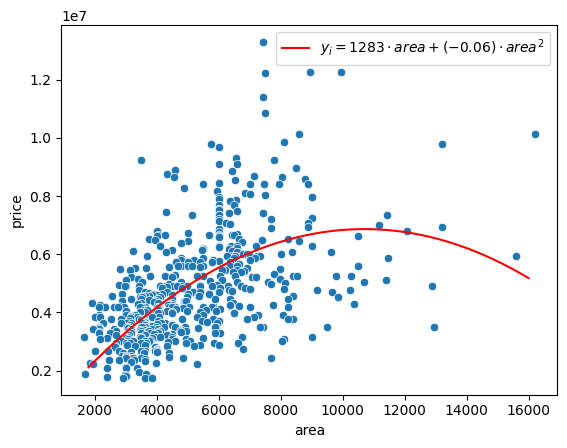

In [ ]:
beta1, beta2 = model.coef_

sns.scatterplot(
    data=house_prices,
    x='area',
    y='price'
)

plt.plot(
    X_test['area'],
    y_test,
    c='red',
    label=f'$y_i = {round(beta1)} \cdot area + ({round(beta2, 3)}) \cdot area ^2 $'
)

plt.legend()
plt.show()

In [ ]:
# R2-score
model.score(X_poly, y)

0.31634485028990944

In [ ]:
# model with Polynomial Features vs. the linear one
mean_squared_error(y, model.predict(X_poly)), mse

(2387409245409.4917, 2488861398180.6567)

In [ ]:
mean_squared_error(y, model.predict(X_poly)) / mse

0.9592375240962289

### With Y-intercept

In [ ]:
model = LinearRegression(fit_intercept=True)
model.fit(X_poly, y)

LinearRegression()

In [ ]:
# X_test = np.linspace(start=1800, stop=16000).reshape(-1, 1)
# with config_context(transform_output="pandas"):
    # X_test = poly.transform(X_test)

y_test = model.predict(X_test)

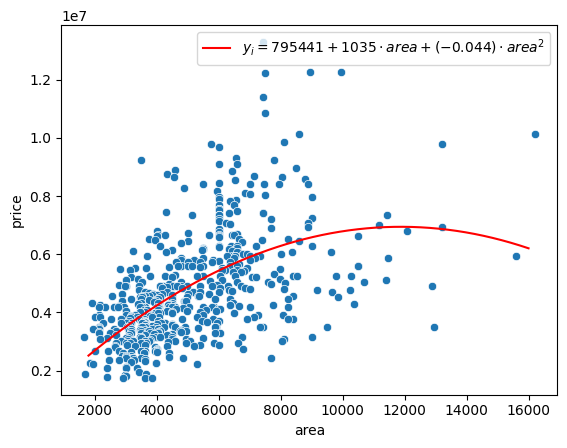

In [ ]:
beta1, beta2 = model.coef_

sns.scatterplot(
    data=house_prices,
    x='area',
    y='price'
)

plt.plot(
    X_test['area'],
    y_test,
    c='red',
    label=f'$y_i = {round(model.intercept_)} + {round(beta1)} \cdot area + ({round(beta2, 3)}) \cdot area ^2 $'
)

plt.legend()
plt.show()

In [ ]:
mean_squared_error(y, model.predict(X_poly)) / mse

0.9497949737537549

Let's also compare R2-scores:

In [ ]:
# exp. I
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print('Linear model, no Y-intercept', model.score(X, y))

# exp. II
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

print('Linear model, with Y-intercept', model.score(X, y))

# exp. III
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

print('Polynomial features, no Y-intercept', model.score(X_poly, y))

# exp. IV
model = LinearRegression(fit_intercept=True)
model.fit(X_poly, y)

print('Polynomial features, with Y-intercept', model.score(X_poly, y))

Linear model, no Y-intercept 0.04162532989195289
Linear model, with Y-intercept 0.2872931546811469
Polynomial features, no Y-intercept 0.31634485028990944
Polynomial features, with Y-intercept 0.3230746205562587


### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Also, try univariate regression with higher powers, namely 3, 4 and 5.

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Multivariate linear regression

In [ ]:
path='/content/drive/MyDrive/SDA Data Science/files/Housing.csv'

house_prices=pd.read_csv(path, usecols=['price', 'area', 'airconditioning'])
house_prices.head()

,price,area,airconditioning
0,13300000,7420,yes
1,12250000,8960,yes
2,12250000,9960,no
3,12215000,7500,yes
4,11410000,7420,yes


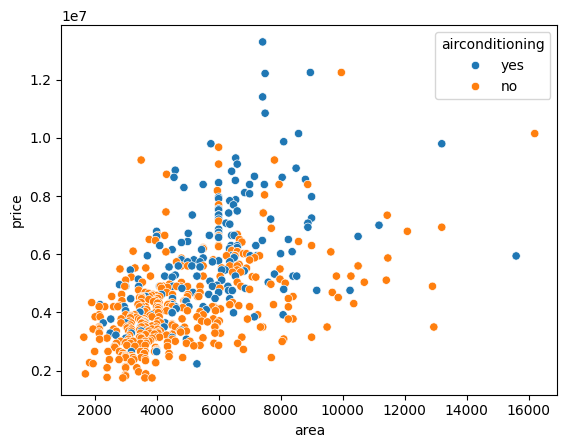

In [ ]:
sns.scatterplot(
    data=house_prices,
    x='area',
    y='price',
    hue='airconditioning'
)

plt.show()

In [ ]:
X = house_prices[['area', 'airconditioning']]
X['airconditioning'] = X['airconditioning'].map({'yes': 1, 'no': 0})
X.head()

<ipython-input-84-5747a49a321d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['airconditioning'] = X['airconditioning'].map({'yes': 1, 'no': 0})


,area,airconditioning
0,7420,1
1,8960,1
2,9960,0
3,7500,1
4,7420,1


In [ ]:
poly = PolynomialFeatures(2, include_bias=False)

with config_context(transform_output="pandas"):
    # the output of transform will be a Pandas DataFrame
    X_poly = poly.fit_transform(X)
X_poly.head()

,area,airconditioning,area^2,area airconditioning,airconditioning^2
0,7420.0,1.0,55056400.0,7420.0,1.0
1,8960.0,1.0,80281600.0,8960.0,1.0
2,9960.0,0.0,99201600.0,0.0,0.0
3,7500.0,1.0,56250000.0,7500.0,1.0
4,7420.0,1.0,55056400.0,7420.0,1.0


In [ ]:
# exp. I
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print('Linear model, no Y-intercept', model.score(X, y))

# exp. II
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

print('Linear model, with Y-intercept', model.score(X, y))

# exp. III
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

print('Polynomial features, no Y-intercept', model.score(X_poly, y))

# exp. IV
model = LinearRegression(fit_intercept=True)
model.fit(X_poly, y)

print('Polynomial features, with Y-intercept', model.score(X_poly, y))

Linear model, no Y-intercept 0.17955783871075826
Linear model, with Y-intercept 0.4044794119161107
Polynomial features, no Y-intercept 0.4078273208892573
Polynomial features, with Y-intercept 0.4278121937905355


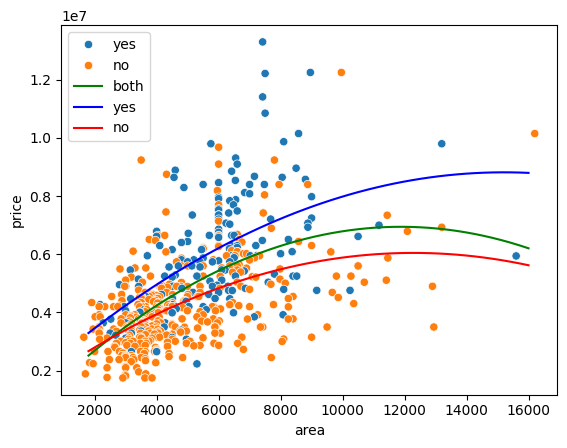

In [ ]:
# with air conditioning
X_test_1 = pd.DataFrame(
    np.linspace(start=1800, stop=16000).reshape(-1, 1),
    columns=['area']
)
X_test_1['airconditioning'] = 1

with config_context(transform_output="pandas"):
    X_test_1 = poly.transform(X_test_1)

y_test_1 = model.predict(X_test_1)

# without air conditioning
X_test_0 = pd.DataFrame(
    np.linspace(start=1800, stop=16000).reshape(-1, 1),
    columns=['area']
)
X_test_0['airconditioning'] = 0

with config_context(transform_output="pandas"):
    X_test_0 = poly.transform(X_test_0)

y_test_0 = model.predict(X_test_0)

sns.scatterplot(
    data=house_prices,
    x='area',
    y='price',
    hue='airconditioning'
)

plt.plot(
    X_test_1['area'],
    y_test,
    c='green',
    label='both'
)

plt.plot(
    X_test_1['area'],
    y_test_1,
    c='blue',
    label='yes'
)

plt.plot(
    X_test_0['area'],
    y_test_0,
    c='red',
    label='no'
)

plt.legend()
plt.show()

In [ ]:
poly = PolynomialFeatures(3)

with config_context(transform_output="pandas"):
    # the output of transform will be a Pandas DataFrame
    X_poly = poly.fit_transform(X)
X_poly.head()

,1,area,airconditioning,area^2,area airconditioning,airconditioning^2,area^3,area^2 airconditioning,area airconditioning^2,airconditioning^3
0,1.0,7420.0,1.0,55056400.0,7420.0,1.0,4.085185e+11,55056400.0,7420.0,1.0
1,1.0,8960.0,1.0,80281600.0,8960.0,1.0,7.193231e+11,80281600.0,8960.0,1.0
2,1.0,9960.0,0.0,99201600.0,0.0,0.0,9.880479e+11,0.0,0.0,0.0
3,1.0,7500.0,1.0,56250000.0,7500.0,1.0,4.218750e+11,56250000.0,7500.0,1.0
4,1.0,7420.0,1.0,55056400.0,7420.0,1.0,4.085185e+11,55056400.0,7420.0,1.0


In [ ]:
# exp. I
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

print('Linear model, no Y-intercept', model.score(X, y))

# exp. II
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

print('Linear model, with Y-intercept', model.score(X, y))

# exp. III
model = LinearRegression(fit_intercept=False)
model.fit(X_poly, y)

print('Polynomial features, no Y-intercept', model.score(X_poly, y))

# exp. IV
model = LinearRegression(fit_intercept=True)
model.fit(X_poly, y)

print('Polynomial features, with Y-intercept', model.score(X_poly, y))

Linear model, no Y-intercept 0.17955783871075826
Linear model, with Y-intercept 0.4044794119161107
Polynomial features, no Y-intercept 0.4400801354332573
Polynomial features, with Y-intercept 0.4400801354332625


### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Load the dataset again this time downloading all available features. Play with different models and see which one gives the best results.

Check what effect additional scaling of variables has on the model performance.

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
```

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## [OPTIONAL] Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X[['area']], y)

DecisionTreeRegressor(random_state=0)

In [ ]:
model.score(X[['area']], y)

0.7505845057863226

In [ ]:
X_test = np.linspace(start=1800, stop=16000).reshape(-1, 1)
y_test = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


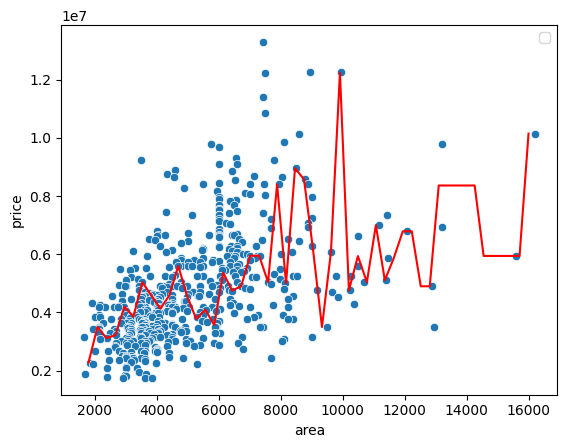

In [ ]:
sns.scatterplot(
    data=house_prices,
    x='area',
    y='price'
)

plt.plot(
    X_test,
    y_test,
    c='red'
)

plt.legend()
plt.show()

### Model generalization (train/test split & CV)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = DecisionTreeRegressor(random_state=0)
model.fit(X_train[['area']], y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
model.score(X_train[['area']], y_train)

0.7670374554586846

In [ ]:
model.score(X_test[['area']], y_test)

0.27182241722105016

### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Train Decision Tree Regressor using all of the columns available. Make sure that the final model generalizes well and find the best hyper-parameters.

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Support Vector Machines (SVM)

When solving classification problems you will learn about several more models and one of them is SVM. Research the documentation of this model and without delving into mathematical formulas behing it, train the model and find the best hyper-parameters.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

### **<font color='#306998'>TASK </font><font color='#ffd33b'>FOR YOU</font>**

Train Decision Tree Regressor using all of the columns available. Make sure that the final model generalizes well and find the best hyper-parameters.

<img src="https://drive.google.com/uc?export=view&id=141XOz6N4nk8Ru1sAl7vOsAToCLrSFCAX" alt="SDA logo" width="150" align='right'/>
<br>

## Appendix: Regularization, ie. Lasso & Ridge Regression

Lasso and Ridge regression are two commonly used regularization techniques in machine learning, particularly in linear regression models. They help prevent overfitting and improve the model's generalization performance by adding a penalty term to the loss function.

In scikit-learn (sklearn), a popular machine learning library in Python, you can use the Lasso and Ridge classes to apply these regularization techniques.

* Lasso Regression:

    Lasso regression (also known as L1 regularization) adds the sum of the absolute values of the coefficients as a penalty term to the loss function. This encourages the model to shrink some coefficients to exactly zero, effectively performing feature selection. In sklearn, you can use the Lasso class to apply Lasso regression.
    ```python
    from sklearn.linear_model import Lasso

    lasso = Lasso(alpha=0.5)
    lasso.fit(X, y)

    y_pred = lasso.predict(X)
    ```
* Ridge Regression:
    Ridge regression (also known as L2 regularization) adds the sum of the squared values of the coefficients as a penalty term to the loss function. This encourages the model to reduce the magnitudes of all coefficients without forcing them to zero. Ridge regression can be useful when you have a high-dimensional dataset with many correlated features. In sklearn, you can use the Ridge class to apply Ridge regression.
    ```python
    from sklearn.linear_model import Ridge

    ridge = Ridge(alpha=0.5)
    ridge.fit(X, y)
    
    y_pred = ridge.predict(X_test)
    ```


<img src="https://drive.google.com/uc?export=view&id=1UO2urRciECzoKE_vHy4RMGfFbkOWOGlW" alt="SDA logo" align="left" width="100px" hspace="10px" vspace="10px"/>
<br>

# TASKS

## **<font color='#306998'>Project </font><font color='#ffd33b'>1</font>**

The file [fires_thefts.csv](https://drive.google.com/file/d/1T43IyJhBsLoUfKfLMh7X4678DKph4gyA/view?usp=sharing) contains actual data collected by the _U.S. Commission on Civil Rights_, showing
* the number of fires in a given neighborhood per thousand households (first column)
* the number of burglaries in the same neighborhood per thousand residents (second column).

Create a model that predicts the number of burglaries based on the number of fires.

## **<font color='#306998'>Question </font><font color='#ffd33b'>1.1</font>**

What will the next steps of the simple gradient method look like when it turns out that in the first step, the $\theta=[\theta_0, \theta_1, ..., \theta_n]$ coefficients were randomly initialized with values indicating a local minimum?

## **<font color='#306998'>TASK </font><font color='#ffd33b'>1.2</font>**

Load data from a file, then create X and y variables and assign them appropriate values.

## **<font color='#306998'>TASK </font><font color='#ffd33b'>1.3</font>**

Complete the code implementation of the cost function J describing the least squares method.

Remember that:
$$\begin{array}{rll} J(\theta) &=& \dfrac{1}{m} \displaystyle\sum_{i=1}^{m} \left(h_{\theta}(x^{(i)})  - y^{(i)}\right)^2
\end{array} $$

where $m$ is the number of observations in the data set.

In [ ]:
def J(h, theta, X, y):
    # h - linear function
    # theta = [theta_0, theta_1]
    # X & y - input data (features & target variable)
    pass

## **<font color='#306998'>TASK </font><font color='#ffd33b'>1.4</font>**

Select manually, using the widgets below (without changing the code) the theta parameters in such a way that the value of the cost function is as small as possible.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas as pd
import numpy as np

from IPython.display import Math, clear_output

In [ ]:
def linear_function(theta, x):
    return theta[0] + theta[1] * x

def plot_function(theta, X, color):
    X_new = [min(X) - 1, max(X) + 1]
    y_new = [linear_function(theta, x) for x in X_new]
    plt.plot(X_new, y_new, linewidth=2, color=color)

def plot_points(X, y):
    plt.figure(figsize=(20, 10))
    plt.scatter(X, y, s=200)
    plt.xlabel("Number of fires")
    plt.ylabel("Number of burglaries")

In [ ]:
slider_theta_0 = widgets.FloatSlider(
    min=-20, max=20, step=0.1, value=0,
    description=r'theta0',
    layout={'width': "auto"}
)

slider_theta_1 = widgets.FloatSlider(
    min=-20, max=20, step=0.1, value=0,
    description=r'theta1',
    layout={'width': "auto"}
)

out = widgets.Output()
button = widgets.Button(width=100, description="Show")

def btn_event_handler(event):
    with out:
        clear_output(wait=True)
        plot_points(X, y)
        plot_function([slider_theta_0.value, slider_theta_1.value], X, 'r')
        plt.show()

        display(Math(
            rf"\Large J(\theta) = {J(linear_function, [slider_theta_0.value, slider_theta_1.value], X, y):.4f}"
        ))

with out:
    plot_points(X, y)
    plt.show()

button.on_click(btn_event_handler)
display(widgets.VBox([slider_theta_0, slider_theta_1, button]))
display(out)

## **<font color='#306998'>TASK </font><font color='#ffd33b'>1.5</font>**

Train a linear regression model on this data.

## **<font color='#306998'>TASK </font><font color='#ffd33b'>1.6</font>**

Using the functions implemented above and the coefficients of the trained model, plot a regression line on the graph and calculate the value of the cost function for these coefficients.

Look at how far you were from the ideal solution by selecting the parameters manually.

## **<font color='#306998'>TASK </font><font color='#ffd33b'>1.7</font>**

Use the trained regression model, predict the number of burglaries per thousand residents for neighborhoods with an average of, respectively: 10, 20 and 50 fires per thousand households.

## **<font color='#306998'>TASK </font><font color='#ffd33b'>1.8</font>**

Train a decision tree regressior and make predictions for the same values of fires per thousand households as in **Task 1.7**.

Compare the results obtained.

## **<font color='#306998'>QUESTION </font><font color='#ffd33b'>1.9</font>**

We can train a model and make predictions for sample data. But how do we know how good it is? Think about how we could test the effectiveness of such a model - how to see if and how often it is right or wrong?